In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
suv_data = pd.read_csv("suv.csv")
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [25]:
print("The number of Employees in the dataset are:", str(len(suv_data)))

The number of Employees in the dataset are: 400


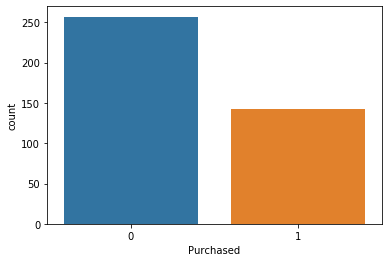

In [26]:
# Analyzing the Data
sns.countplot(x = "Purchased", data = suv_data)

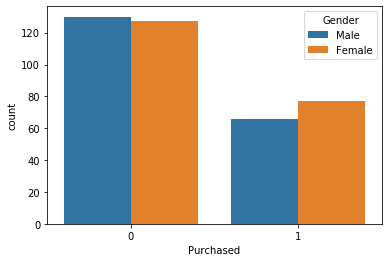

In [27]:
sns.countplot(x = "Purchased", hue = "Gender", data = suv_data)

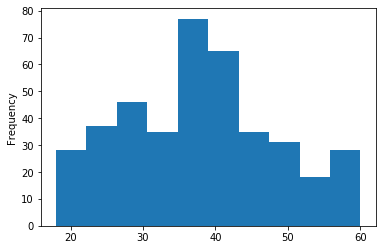

In [28]:
suv_data["Age"].plot.hist()

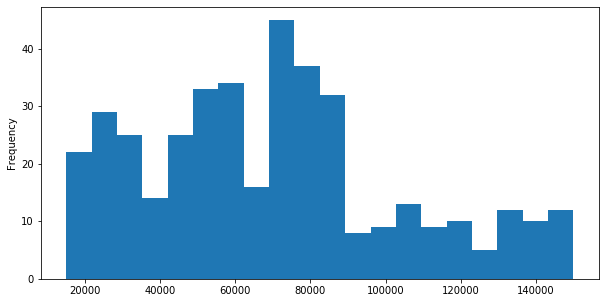

In [29]:
suv_data["EstimatedSalary"].plot.hist(bins=20, figsize = (10, 5))

In [30]:
# Data Wrangling will clean the data.
suv_data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [31]:
suv_data.isnull().sum

<bound method DataFrame.sum of      User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      False   False  False            False      False
4      False   False  False            False      False
..       ...     ...    ...              ...        ...
395    False   False  False            False      False
396    False   False  False            False      False
397    False   False  False            False      False
398    False   False  False            False      False
399    False   False  False            False      False

[400 rows x 5 columns]>

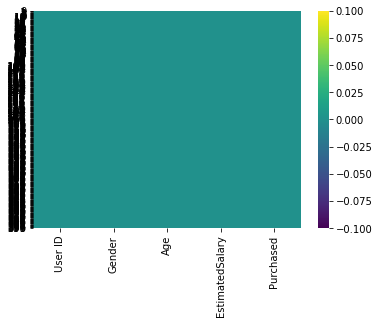

In [32]:
sns.heatmap(suv_data.isnull(), yticklabels = True, cmap = "viridis")

In [33]:
suv_data.dropna(inplace = True)

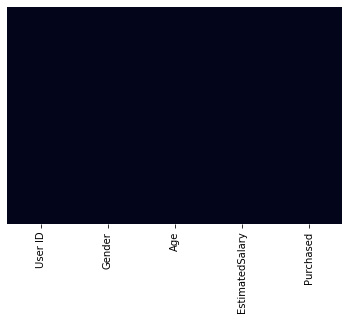

In [34]:
sns.heatmap(suv_data.isnull(), yticklabels = False,cbar = False)

In [35]:
suv_data.drop(["User ID", "Gender"], axis = 1, inplace = True)

In [36]:
suv_data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [38]:
from sklearn.model_selection import train_test_split
X = suv_data.drop("Purchased", axis = 1)
y = suv_data["Purchased"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test, predictions)

/home/bunny/Downloads/anaconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.60      1.00      0.75        72\n           1       0.00      0.00      0.00        48\n\n    accuracy                           0.60       120\n   macro avg       0.30      0.50      0.37       120\nweighted avg       0.36      0.60      0.45       120\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, predictions)


array([[72,  0],
       [48,  0]])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, predictions)

0.6